In [78]:
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [10]:
path_test = "dataset/test"
model = load_model('deeplearningVGG16.h5')

img_test = ImageDataGenerator().flow_from_directory(
    path_test,
    target_size = (224,224),
    shuffle = False
)


Found 4470 images belonging to 3 classes.


In [52]:
result = img_test.classes

In [14]:
predict = model.predict(img_test)

In [44]:
print(result)
print(predictResult)

[0 0 0 ... 2 2 2]
[0 0 0 ... 2 2 2]


In [17]:
print(predict)

[[9.1372603e-01 4.3504670e-02 4.2769294e-02]
 [7.9412228e-01 1.5696746e-01 4.8910245e-02]
 [8.7193775e-01 5.6883637e-02 7.1178600e-02]
 ...
 [5.9410895e-04 2.7918105e-04 9.9912673e-01]
 [2.0839238e-01 7.4948139e-02 7.1665949e-01]
 [4.7502995e-02 2.2432240e-02 9.3006480e-01]]


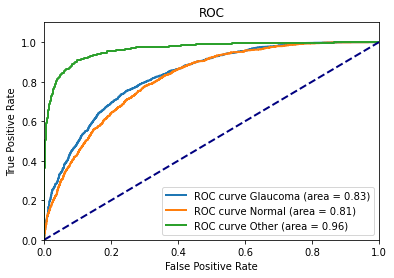

In [76]:
fprG , tprG , thres = metrics.roc_curve(result,predict[:,0],pos_label=0)
fprN , tprN , thres = metrics.roc_curve(result,predict[:,1],pos_label=1)
fprO , tprO , thres = metrics.roc_curve(result,predict[:,2],pos_label=2)

roc_aucG = auc(fprG, tprG)
roc_aucN = auc(fprN, tprN)
roc_aucO = auc(fprO, tprO)

lw = 2
plt.plot(fprG,tprG,lw=2,label='ROC curve Glaucoma (area = %.2f)'%roc_aucG)
plt.plot(fprN,tprN,lw=lw,label='ROC curve Normal (area = %.2f)'%roc_aucN)
plt.plot(fprO,tprO,lw=2,label='ROC curve Other (area = %.2f)'%roc_aucO)
plt.plot([0,1],[0,1],color ='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [50]:
predictResult = predict.argmax(axis = 1)

print(metrics.classification_report(result,predictResult,digits=5))

              precision    recall  f1-score   support

           0    0.75522   0.67079   0.71051      2102
           1    0.60780   0.67697   0.64052      1520
           2    0.78791   0.84552   0.81570       848

    accuracy                        0.70604      4470
   macro avg    0.71698   0.73109   0.72224      4470
weighted avg    0.71129   0.70604   0.70667      4470



In [84]:
print(confusion_matrix(result, predictResult))

[[1410  579  113]
 [ 411 1029   80]
 [  46   85  717]]
